# 0.0 Import Libriaries

In [9]:
import pandas as pd
import numpy as np

from sklearn import metrics as mt
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt

import warnings

# 0.1 Loading Dataset

In [4]:
X = pd.read_csv("X_dataset.csv")

In [5]:
X.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


In [6]:
X.shape

(178, 13)

# 1.0 K Means

In [31]:
warnings.filterwarnings('ignore')

cluster_list = np.arange(2, 21, 1)
ss_list = []

for i in cluster_list:
    #define
    model = KMeans(n_clusters=i)
    # fit_predict
    labels = model.fit_predict(X)
    # metrics
    ss = np.round(mt.silhouette_score(X, labels), 4)
    ss_list.append(ss)

    print(f"For a k = {i} - Silhouette Score = {ss}")

For a k = 2 - Silhouette Score = 0.2132
For a k = 3 - Silhouette Score = 0.2331
For a k = 4 - Silhouette Score = 0.2051
For a k = 5 - Silhouette Score = 0.2257
For a k = 6 - Silhouette Score = 0.1977
For a k = 7 - Silhouette Score = 0.1982
For a k = 8 - Silhouette Score = 0.1919
For a k = 9 - Silhouette Score = 0.1936
For a k = 10 - Silhouette Score = 0.1745
For a k = 11 - Silhouette Score = 0.1772
For a k = 12 - Silhouette Score = 0.159
For a k = 13 - Silhouette Score = 0.1615
For a k = 14 - Silhouette Score = 0.1752
For a k = 15 - Silhouette Score = 0.1631
For a k = 16 - Silhouette Score = 0.1807
For a k = 17 - Silhouette Score = 0.1755
For a k = 18 - Silhouette Score = 0.1769
For a k = 19 - Silhouette Score = 0.1745
For a k = 20 - Silhouette Score = 0.171


In [32]:
# Max Silhouette Score Value
ss_max = max(ss_list)

# Max Silhouette Score Index
ss_max_index = ss_list.index(ss_max)

print(f"For a k = {cluster_list[ss_max_index]} ---> Silhouette Score = {ss_max}")

For a k = 3 ---> Silhouette Score = 0.2331


Text(0, 0.5, 'Silhouette Score')

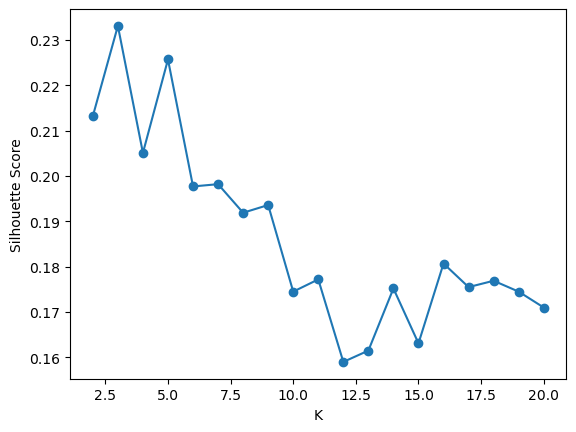

In [33]:
# Elbow Method Plot
plt.plot(cluster_list, ss_list, '-o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")